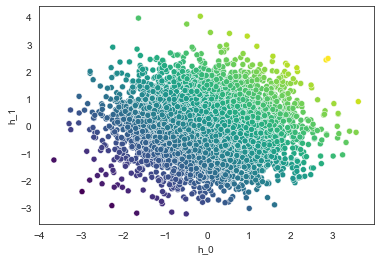

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

seed_n = 1
np.random.seed(seed_n)

# Generate Gaussian white noise data
mean, std, h_shape = 0, 1, (5000, 2)
hidden = np.random.normal(mean, std, h_shape)

# Create a dataframe to carry the data
column_names = [f'h_{i}' for i in range(h_shape[1])]
data = pd.DataFrame(hidden, columns=column_names)

# Define linear labels
data['y'] = data['h_0'] + data['h_1']

# Settings for plots
sns.set_style('white')
viridis_map = sns.color_palette('viridis', as_cmap=True)

# Plot the hidden factors colored by y
sns.scatterplot(data=data, x='h_0', y='h_1', hue='y',
                palette=viridis_map).get_legend().remove()
plt.show()

In [2]:
def relu(v):
    return np.maximum(0, v)

def softplus(v):
    return np.log(1 + np.exp(v))

data['x_0'] = relu(data['h_0'] + data['h_1'])
data['x_1'] = softplus(data['h_0'] + data['h_1'])
data['x_2'] = data['h_0'] - data['h_1']

data.head()

,h_0,h_1,y,x_0,x_1,x_2
0,1.624345,-0.611756,1.012589,1.012589,1.322480,2.236102
1,-0.528172,-1.072969,-1.601140,0.000000,0.183709,0.544797
2,0.865408,-2.301539,-1.436131,0.000000,0.213373,3.166946
3,1.744812,-0.761207,0.983605,0.983605,1.301302,2.506019
4,0.319039,-0.249370,0.069669,0.069669,0.728588,0.568409


In [3]:
from sklearn.ensemble import RandomForestRegressor

# Train two random forest models
relu_data, soft_data, y = data[['x_0', 'x_2']], data[['x_1', 'x_2']], data['y']
relu_regressor = RandomForestRegressor(max_depth=3).fit(relu_data, y)
soft_regressor = RandomForestRegressor(max_depth=3).fit(soft_data, y)

# Get the accuracy of the models
print(f'relu score: {relu_regressor.score(relu_data, y):.2f},\n'
      f'soft score: {soft_regressor.score(soft_data, y):.2f}')

relu score: 0.81,
soft score: 0.97
